In [1]:
from nequip.utils import Config
from nequip.scripts.train import default_config, fresh_start
from nequip.train._key import TRAIN, VALIDATION

In [2]:
filename = "example.yaml"
config = Config.from_file(filename, defaults=default_config)
config['wandb'] = False
config['max_epochs'] = 3

In [3]:
config['key_mapping']

{'z': 'atomic_numbers', 'E': 'total_energy', 'F': 'forces', 'R': 'pos'}

In [4]:
for key in config.keys():
    print(f"{key}: {config[key]}")

_jit_bailout_depth: 2
_jit_fusion_strategy: [('DYNAMIC', 3)]
root: results/toluene
run_name: example-run-toluene
wandb: False
wandb_project: toluene-example
model_builders: ['SimpleIrrepsConfig', 'EnergyModel', 'PerSpeciesRescale', 'ForceOutput', 'RescaleEnergyEtc']
dataset_statistics_stride: 1
default_dtype: float32
allow_tf32: False
verbose: info
model_debug_mode: False
equivariance_test: False
grad_anomaly_mode: False
append: True
seed: 123
dataset_seed: 456
r_max: 4.0
num_layers: 4
l_max: 2
parity: True
num_features: 32
nonlinearity_type: gate
nonlinearity_scalars: {'e': 'silu', 'o': 'tanh'}
nonlinearity_gates: {'e': 'silu', 'o': 'tanh'}
num_basis: 8
BesselBasis_trainable: True
PolynomialCutoff_p: 6
invariant_layers: 2
invariant_neurons: 64
avg_num_neighbors: auto
use_sc: True
dataset: npz
dataset_url: http://quantum-machine.org/gdml/data/npz/toluene_ccsd_t.zip
dataset_file_name: ./benchmark_data/toluene_ccsd_t-train.npz
key_mapping: {'z': 'atomic_numbers', 'E': 'total_energy', 'F'

# def train の実装

scripts/train.py

In [43]:
trainer = fresh_start(config=config)
trainer.init()

Torch device: cpu
Successfully loaded the data set of type NpzDataset(1000)...
Replace string dataset_forces_rms to 30.621034622192383
Replace string dataset_per_atom_total_energy_mean to -11319.556640625
Atomic outputs are scaled by: [H, C: 30.621035], shifted by [H, C: -11319.556641].
Replace string dataset_forces_rms to 30.621034622192383
Initially outputs are globally scaled by: 30.621034622192383, total_energy are globally shifted by None.
Successfully built the network...
Number of weights: 363096
Number of trainable weights: 363096


In [44]:
type(trainer)

nequip.train.trainer.Trainer

In [45]:
print(type(trainer.model))
print(type(trainer.model.model))
print(type(trainer.model.model.func))

<class 'nequip.nn._rescale.RescaleOutput'>
<class 'nequip.nn._grad_output.GradientOutput'>
<class 'nequip.nn._graph_mixin.SequentialGraphNetwork'>


In [46]:
import nequip
nequip.__version__

'0.5.6'

In [47]:
for i, module in enumerate(trainer.model.model.func):
    print(f"{i}th layer: {type(module)}")

0th layer: <class 'nequip.nn.embedding._one_hot.OneHotAtomEncoding'>
1th layer: <class 'nequip.nn.embedding._edge.SphericalHarmonicEdgeAttrs'>
2th layer: <class 'nequip.nn.embedding._edge.RadialBasisEdgeEncoding'>
3th layer: <class 'nequip.nn._atomwise.AtomwiseLinear'>
4th layer: <class 'nequip.nn._convnetlayer.ConvNetLayer'>
5th layer: <class 'nequip.nn._convnetlayer.ConvNetLayer'>
6th layer: <class 'nequip.nn._convnetlayer.ConvNetLayer'>
7th layer: <class 'nequip.nn._convnetlayer.ConvNetLayer'>
8th layer: <class 'nequip.nn._atomwise.AtomwiseLinear'>
9th layer: <class 'nequip.nn._atomwise.AtomwiseLinear'>
10th layer: <class 'nequip.nn._atomwise.PerSpeciesScaleShift'>
11th layer: <class 'nequip.nn._atomwise.AtomwiseReduce'>


In [48]:
for key, value in config.items():
    print(key, value)

_jit_bailout_depth 2
_jit_fusion_strategy [('DYNAMIC', 3)]
root results/toluene
run_name example-run-toluene
wandb False
wandb_project toluene-example
model_builders ['SimpleIrrepsConfig', 'EnergyModel', 'PerSpeciesRescale', 'ForceOutput', 'RescaleEnergyEtc']
dataset_statistics_stride 1
default_dtype float32
allow_tf32 False
verbose info
model_debug_mode False
equivariance_test False
grad_anomaly_mode False
append True
seed 123
dataset_seed 456
r_max 4.0
num_layers 4
l_max 2
parity True
num_features 32
nonlinearity_type gate
nonlinearity_scalars {'e': 'silu', 'o': 'tanh'}
nonlinearity_gates {'e': 'silu', 'o': 'tanh'}
num_basis 8
BesselBasis_trainable True
PolynomialCutoff_p 6
invariant_layers 2
invariant_neurons 64
avg_num_neighbors 10.28933334350586
use_sc True
dataset npz
dataset_url http://quantum-machine.org/gdml/data/npz/toluene_ccsd_t.zip
dataset_file_name ./benchmark_data/toluene_ccsd_t-train.npz
key_mapping {'z': 'atomic_numbers', 'E': 'total_energy', 'F': 'forces', 'R': 'pos'}

In [49]:
type(trainer.model)

nequip.nn._rescale.RescaleOutput

In [50]:
trainer.init_keys

['model_builders',
 'device',
 'seed',
 'dataset_seed',
 'loss_coeffs',
 'train_on_keys',
 'metrics_components',
 'metrics_key',
 'early_stopping',
 'early_stopping_kwargs',
 'max_epochs',
 'learning_rate',
 'lr_scheduler_name',
 'lr_scheduler_kwargs',
 'optimizer_name',
 'optimizer_kwargs',
 'max_gradient_norm',
 'use_ema',
 'ema_decay',
 'ema_use_num_updates',
 'exclude_keys',
 'batch_size',
 'validation_batch_size',
 'shuffle',
 'n_train',
 'n_val',
 'dataloader_num_workers',
 'train_idcs',
 'val_idcs',
 'train_val_split',
 'init_callbacks',
 'end_of_epoch_callbacks',
 'end_of_batch_callbacks',
 'end_of_train_callbacks',
 'final_callbacks',
 'log_batch_freq',
 'log_epoch_freq',
 'save_checkpoint_freq',
 'save_ema_checkpoint_freq',
 'report_init_validation',
 'verbose']

# training 詳細

1 epoch で用いるデータは、今回のように train_dataset に 1000 件のみで validation_datset が存在しない場合、
train_data として、`trainer.n_train` 件のデータと、validation_data として、`trainer.n_val` 件のデータをサンプルする。

In [51]:
print(f"n_train: {trainer.n_train}")
print(f"n_val: {trainer.n_val}")

n_train: 100
n_val: 50


In [52]:
print(type(trainer.dataset_train))
print(trainer.dataset_train)
print(trainer.dataset_val)

<class 'nequip.data.dataset.NpzDataset'>
NpzDataset(100)
NpzDataset(50)


dataset を用いて dataloader を作製する。バッチサイズは、`trainer.batch_size`

In [53]:
print(trainer.batch_size)
print(type(trainer.dl_train))
for batch_data in trainer.dl_train:
    break
print(type(batch_data))

5
<class 'nequip.data.dataloader.DataLoader'>
<class 'nequip.utils.torch_geometric.batch.Batch'>


In [54]:
print(batch_data)
print(batch_data.batch)

Batch(atom_types=[75, 1], batch=[75], cell=[5, 3, 3], edge_cell_shift=[766, 3], edge_index=[2, 766], forces=[75, 3], pbc=[5, 3], pos=[75, 3], ptr=[6], r_max=[5], total_energy=[5, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4])


1 構造あたり 15 原子 × 5 構造 = 75 原子分のデータが flatten された形になっている。

In [55]:
batch_data.cell

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

格子情報がない場合は 0 埋めされている。

## 学習

batch データを用いた学習は、trainer.batch_step で行われている。

In [106]:
from nequip.data import AtomicData
    
data = AtomicData.to_AtomicDataDict(batch_data)
print(type(data))
print(data.keys())

<class 'dict'>
dict_keys(['edge_index', 'pos', 'batch', 'ptr', 'cell', 'edge_cell_shift', 'pbc', 'total_energy', 'forces', 'r_max', 'atom_types'])


In [107]:
print(data['total_energy'])
print(data['pbc'])
print(data['pos'].shape)
print(data['r_max'])
print(data['batch'])
print(data['atom_types'][:15])

tensor([[-169796.9219],
        [-169789.1875],
        [-169786.2500],
        [-169801.3750],
        [-169780.5938]])
tensor([[False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False]])
torch.Size([75, 3])
tensor([4., 4., 4., 4., 4.])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4])
tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


## rescale layers

- エネルギーのゼロ点シフトなどなどを制御していると思われる。
- attribute: training でトレーニング中か validation 中かを制御している。

In [108]:
print(len(trainer.rescale_layers))
print(type(trainer.rescale_layers[0]))
print(trainer.rescale_layers[0].training)

1
<class 'nequip.nn._rescale.RescaleOutput'>
True


In [109]:
data_unscaled = data
for layer in trainer.rescale_layers:
    data_unscaled = layer.unscale(data_unscaled)

## モデルに投入

In [112]:
print(trainer._remove_from_model_input)
input_data = {k: v for k, v in data_unscaled.items() if k not in trainer._remove_from_model_input}
print(data.keys())
print(input_data.keys())

{'virial', 'total_energy', 'atomic_energy', 'stress', 'forces', 'partial_forces'}
dict_keys(['edge_index', 'pos', 'batch', 'ptr', 'cell', 'edge_cell_shift', 'pbc', 'total_energy', 'forces', 'r_max', 'atom_types'])
dict_keys(['edge_index', 'pos', 'batch', 'ptr', 'cell', 'edge_cell_shift', 'pbc', 'r_max', 'atom_types'])


In [65]:
input_data['edge_index']

tensor([[ 0,  0,  0,  ..., 74, 74, 74],
        [14,  9,  8,  ..., 60, 73, 66]])

In [66]:
input_data['ptr']

tensor([ 0, 15, 30, 45, 60, 75])

In [67]:
input_data['edge_cell_shift']

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [70]:
input_data['pbc']

tensor([[False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False]])

In [71]:
input_data['r_max']

tensor([4., 4., 4., 4., 4.])

In [62]:
for key in input_data:
    print(f"{key}: {input_data[key].shape}")

edge_index: torch.Size([2, 766])
pos: torch.Size([75, 3])
batch: torch.Size([75])
ptr: torch.Size([6])
cell: torch.Size([5, 3, 3])
edge_cell_shift: torch.Size([766, 3])
pbc: torch.Size([5, 3])
r_max: torch.Size([5])
atom_types: torch.Size([75, 1])


In [83]:
out = trainer.model(input_data)

In [78]:
trainer.model

RescaleOutput(
  (model): GradientOutput(
    (func): SequentialGraphNetwork(
      (one_hot): OneHotAtomEncoding()
      (spharm_edges): SphericalHarmonicEdgeAttrs(
        (sh): SphericalHarmonics()
      )
      (radial_basis): RadialBasisEdgeEncoding(
        (basis): BesselBasis()
        (cutoff): PolynomialCutoff()
      )
      (chemical_embedding): AtomwiseLinear(
        (linear): Linear(2x0e -> 32x0e | 64 weights)
      )
      (layer0_convnet): ConvNetLayer(
        (equivariant_nonlin): Gate (96x0e+32x1o+32x2e -> 32x0e+32x2e+32x1o)
        (conv): InteractionBlock(
          (linear_1): Linear(32x0e -> 32x0e | 1024 weights)
          (fc): FullyConnectedNet[8, 64, 64, 96]
          (tp): TensorProduct(32x0e x 1x0e+1x1o+1x2e -> 32x0e+32x1o+32x2e | 96 paths | 96 weights)
          (linear_2): Linear(32x0e+32x1o+32x2e -> 96x0e+32x1o+32x2e | 5120 weights)
          (sc): FullyConnectedTensorProduct(32x0e x 2x0e -> 96x0e+32x1o+32x2e | 6144 paths | 6144 weights)
        )
      

In [75]:
type(trainer.model)

nequip.nn._rescale.RescaleOutput

RescaleOutput class の forward は以下。RescaleOutput.model に食わせてる。

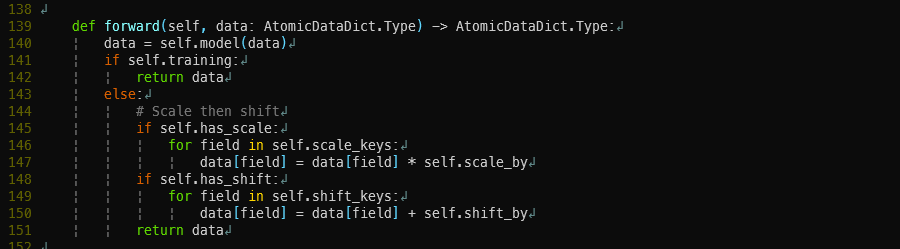

In [76]:
type(trainer.model.model)

nequip.nn._grad_output.GradientOutput

nequip.nn._grad_output.GradientOutput は `self.func` にデータを食わせた後に forces の計算をしてる

In [85]:
type(trainer.model.model.func)

nequip.nn._graph_mixin.SequentialGraphNetwork

In [86]:
sequ_func = trainer.model.model.func

In [91]:
for module in sequ_func:
    print(type(module))

<class 'nequip.nn.embedding._one_hot.OneHotAtomEncoding'>
<class 'nequip.nn.embedding._edge.SphericalHarmonicEdgeAttrs'>
<class 'nequip.nn.embedding._edge.RadialBasisEdgeEncoding'>
<class 'nequip.nn._atomwise.AtomwiseLinear'>
<class 'nequip.nn._convnetlayer.ConvNetLayer'>
<class 'nequip.nn._convnetlayer.ConvNetLayer'>
<class 'nequip.nn._convnetlayer.ConvNetLayer'>
<class 'nequip.nn._convnetlayer.ConvNetLayer'>
<class 'nequip.nn._atomwise.AtomwiseLinear'>
<class 'nequip.nn._atomwise.AtomwiseLinear'>
<class 'nequip.nn._atomwise.PerSpeciesScaleShift'>
<class 'nequip.nn._atomwise.AtomwiseReduce'>


nequip.nn._graph_mixin.SequentialGraphNetwork は、`module` に順番にデータを食わせている。

### OneHotAtomEncoding

In [93]:
module = sequ_func[0]
print(type(module))

<class 'nequip.nn.embedding._one_hot.OneHotAtomEncoding'>


In [97]:
print(module.irreps_in)
print(module.irreps_out)

{'pos': 1x1o, 'edge_index': None}
{'pos': 1x1o, 'edge_index': None, 'node_attrs': 2x0e, 'node_features': 2x0e}


In [113]:
print(input_data.keys())
input_data = module(input_data)
print(input_data.keys())

dict_keys(['edge_index', 'pos', 'batch', 'ptr', 'cell', 'edge_cell_shift', 'pbc', 'r_max', 'atom_types'])
dict_keys(['edge_index', 'pos', 'batch', 'ptr', 'cell', 'edge_cell_shift', 'pbc', 'r_max', 'atom_types', 'node_attrs', 'node_features'])


### SphericalBasisEdgeEncoding

In [114]:
module = sequ_func[1]
print(type(module))

<class 'nequip.nn.embedding._edge.SphericalHarmonicEdgeAttrs'>


In [117]:
print(module.out_field)
print(module.irreps_in)
print(module.irreps_out)
print(module.sh)

edge_attrs
{'pos': 1x1o, 'edge_index': None, 'node_attrs': 2x0e, 'node_features': 2x0e}
{'pos': 1x1o, 'edge_index': None, 'node_attrs': 2x0e, 'node_features': 2x0e, 'edge_attrs': 1x0e+1x1o+1x2e}
SphericalHarmonics()


In [118]:
print(input_data.keys())
input_data = module(input_data)
print(input_data.keys())

dict_keys(['edge_index', 'pos', 'batch', 'ptr', 'cell', 'edge_cell_shift', 'pbc', 'r_max', 'atom_types', 'node_attrs', 'node_features'])
dict_keys(['edge_index', 'pos', 'batch', 'ptr', 'cell', 'edge_cell_shift', 'pbc', 'r_max', 'atom_types', 'node_attrs', 'node_features', 'edge_vectors', 'edge_attrs'])


In [120]:
print(input_data['edge_vectors'].shape)
print(input_data['edge_attrs'].shape)

torch.Size([766, 3])
torch.Size([766, 9])


### RadialBasisEdgeEncoding

In [125]:
module = sequ_func[2]
print(type(module))

<class 'nequip.nn.embedding._edge.RadialBasisEdgeEncoding'>


In [131]:
print(module.out_field)
print(module.basis.num_basis)
print(module.cutoff.p)
print(module.irreps_in)
print(module.irreps_out)

edge_embedding
8
6.0
{'pos': 1x1o, 'edge_index': None, 'node_attrs': 2x0e, 'node_features': 2x0e, 'edge_attrs': 1x0e+1x1o+1x2e}
{'pos': 1x1o, 'edge_index': None, 'node_attrs': 2x0e, 'node_features': 2x0e, 'edge_attrs': 1x0e+1x1o+1x2e, 'edge_embedding': 8x0e}


In [29]:
print(out['atomic_energy'].shape)
print(out['total_energy'].shape)
print(out['forces'].shape)

torch.Size([75, 1])
torch.Size([5, 1])
torch.Size([75, 3])


### AtomwiseLinear

In [132]:
module = sequ_func[3]
print(type(module))

<class 'nequip.nn._atomwise.AtomwiseLinear'>


In [135]:
print(module.field)
print(module.out_field)
print(module.linear)

node_features
node_features
Linear(2x0e -> 32x0e | 64 weights)


In [138]:
print(input_data['node_features'].shape)
input_data = module(input_data)
print(input_data['node_features'].shape)

torch.Size([75, 2])
torch.Size([75, 32])


ここで、原子の one-hot 表現が vectorize されている。

### ConvNetLayer

self.conv にデータを食わせてる。

In [140]:
module = sequ_func[4]
print(type(module))
print(type(module.conv))

<class 'nequip.nn._convnetlayer.ConvNetLayer'>
<class 'nequip.nn._interaction_block.InteractionBlock'>


In [154]:
input_data['node_features'].shape

torch.Size([75, 32])

In [141]:
module_conv = module.conv

In [156]:
display(module_conv.fc)
display(module_conv.sc)
display(module_conv.linear_1)  # 論文の architecture 図の真ん中の図のなかの Self-Interaction 1個目
display(module_conv.linear_2)  # 論文の architecture 図の真ん中の図のなかの Self-Interaction 2個目

FullyConnectedNet[8, 64, 64, 96]

FullyConnectedTensorProduct(32x0e x 2x0e -> 96x0e+32x1o+32x2e | 6144 paths | 6144 weights)

Linear(32x0e -> 32x0e | 1024 weights)

Linear(32x0e+32x1o+32x2e -> 96x0e+32x1o+32x2e | 5120 weights)

In [144]:
display(module_conv.irreps_in)
display(module_conv.irreps_out)

{'pos': 1x1o,
 'edge_index': None,
 'node_attrs': 2x0e,
 'node_features': 32x0e,
 'edge_attrs': 1x0e+1x1o+1x2e,
 'edge_embedding': 8x0e}

{'pos': 1x1o,
 'edge_index': None,
 'node_attrs': 2x0e,
 'node_features': 96x0e+32x1o+32x2e,
 'edge_attrs': 1x0e+1x1o+1x2e,
 'edge_embedding': 8x0e}

### AtomwiseLinear

In [158]:
module = sequ_func[8]
print(type(module))

<class 'nequip.nn._atomwise.AtomwiseLinear'>


In [159]:
print(module.field)
print(module.out_field)
print(module.linear)

node_features
node_features
Linear(32x0e+32x0o+32x1e+32x2e+32x1o+32x2o -> 16x0e | 512 weights)


### AtomwiseLinear

In [160]:
module = sequ_func[9]
print(type(module))

<class 'nequip.nn._atomwise.AtomwiseLinear'>


In [161]:
print(module.field)
print(module.out_field)
print(module.linear)

node_features
atomic_energy
Linear(16x0e -> 1x0e | 16 weights)


### AtomwiseReduce

In [162]:
module = sequ_func[11]
print(type(module))

<class 'nequip.nn._atomwise.AtomwiseReduce'>


In [164]:
print(module.field)
print(module.out_field)

atomic_energy
total_energy


# loss の計算

In [27]:
scaled_out = out
_data_unscaled = data
for layer in trainer.rescale_layers:
    scaled_out = layer.unscale(scaled_out, force_process=True)
    _data_unscaled = layer.unscale(_data_unscaled, force_process=True)
loss, loss_contrib = trainer.loss(pred=scaled_out, ref=_data_unscaled)

loss は `trainer.metrics` で計算されて、`trainer.batch_metcrics` にたまっていく。

In [28]:
trainer.metrics(pred=out, ref=data)

{('forces', '12ebceaca16bd980a3dfbc4702e8dbd902bef5a6'): tensor([5.8387]),
 ('forces', '35b714334e060566eb13eac19a9f84425ed11d77'): tensor([7.8448]),
 ('forces',
  'a7d60b84bfcd7c917797277ef790f7e160eb6a46'): tensor([3.8606, 8.0993]),
 ('forces',
  'aafef9af8caf04c4bb20e7018fd1a7698a202857'): tensor([ 5.0542, 10.1331]),
 ('total_energy',
  '722d01c6abd2c50191bfadef18bbb094a636118a'): tensor([11.6281], grad_fn=<NanToNumBackward0>),
 ('total_energy',
  '635348b456d9fa18a6d3f6e130fb98bec1ccdd50'): tensor([0.7752], grad_fn=<NanToNumBackward0>)}

In [29]:
trainer.batch_metrics

{('forces', '12ebceaca16bd980a3dfbc4702e8dbd902bef5a6'): tensor([6.4898]),
 ('forces', '35b714334e060566eb13eac19a9f84425ed11d77'): tensor([8.9425]),
 ('forces',
  'a7d60b84bfcd7c917797277ef790f7e160eb6a46'): tensor([4.0525, 9.2754]),
 ('forces',
  'aafef9af8caf04c4bb20e7018fd1a7698a202857'): tensor([ 5.0328, 11.9338]),
 ('total_energy',
  '722d01c6abd2c50191bfadef18bbb094a636118a'): tensor([4.1906]),
 ('total_energy',
  '635348b456d9fa18a6d3f6e130fb98bec1ccdd50'): tensor([0.2794])}